# Porco ou cachorro?

In [198]:
#features (1-sim ; 0-não)
#pelo longo?
#perna curta?
#late?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]
cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# porco-1 ; cachorro-0
x_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
y_train = [1,1,1,0,0,0]

In [199]:
from sklearn.svm import LinearSVC

In [200]:
model = LinearSVC()
model.fit(x_train, y_train )

LinearSVC()

In [201]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [202]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
x_test = [misterio1,misterio2,misterio3]

previsoes = model.predict(x_test)
previsoes

array([0, 1, 0])

In [203]:
y_test = [0,1,1]

In [204]:
corretos = (previsoes == testes_classes).sum()
total = len(x_test)
taxa_de_acerto = corretos/total
print('Taxa de acerto:', (taxa_de_acerto*100).round(2), "%")


Taxa de acerto: 66.67 %


In [205]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(y_test, previsoes)
print('Taxa de acerto:', (taxa_de_acerto*100).round(2), "%")

Taxa de acerto: 66.67 %


# Visita Sites

In [206]:
import pandas as pd

In [207]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')

In [208]:

maps = {'home':'principal','how_it_works':'como_funciona','contact':'contato','bought':'compra'}
dados = dados.rename(columns=maps)
dados.head()

,principal,como_funciona,contato,compra
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [209]:
x = dados[['principal','como_funciona','contato']]
y = dados['compra']

In [210]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compra, dtype: int64

In [211]:
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [212]:
dados.shape

(99, 4)

In [213]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [214]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
print(f'Acurácia: {(accuracy_score(teste_y, previsoes)*100).round(2)}%')

Acurácia: 95.83%


In [215]:
from sklearn.model_selection import train_test_split

In [216]:
treino_x, teste_x, treino_y , teste_y = train_test_split(x,y,random_state=20,test_size=0.25,stratify=y)

In [217]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
print(f'Acurácia: {(accuracy_score(teste_y, previsoes)*100).round(2)}%')

Acurácia: 96.0%


In [218]:
treino_y.value_counts()

0    49
1    25
Name: compra, dtype: int64

In [219]:
teste_y.value_counts()

0    17
1     8
Name: compra, dtype: int64

# Projeo Web

In [220]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [221]:
traducao = {'unfinished':'nao_finalizado','expected_hours':'horas_esperadas','price':'preço'}
dados = dados.rename(columns=traducao)
dados.head()

,nao_finalizado,horas_esperadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [222]:
troca = {0:1,1:0}
dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [223]:
import seaborn as sns

<AxesSubplot:xlabel='horas_esperadas', ylabel='preço'>

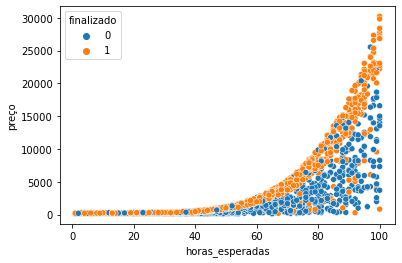

In [224]:

sns.scatterplot(x='horas_esperadas', y='preço', data=dados, hue='finalizado')

In [225]:
x= dados[['horas_esperadas','preço']]
y= dados['finalizado']

In [226]:
treino_x, teste_x, treino_y , teste_y = train_test_split(x,y,random_state=20,test_size=0.25,stratify=y)

In [227]:
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)*100
print('Acurácia: ', acuracia.round(2),'%')

Acurácia:  52.78 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<AxesSubplot:xlabel='horas_esperadas', ylabel='preço'>

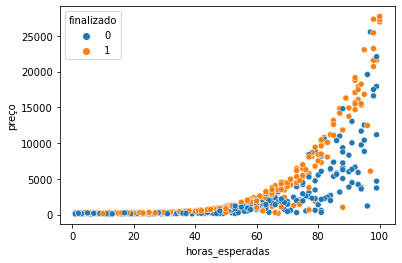

In [228]:
sns.scatterplot(x='horas_esperadas', y='preço', data=teste_x, hue=teste_y)

In [229]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
SEED=5
modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 53.89%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Preço de Carro

In [230]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [231]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [232]:
dados = dados.rename(columns={'mileage_per_year':'milhas_por_ano','model_year':'ano_modelo','price':'preço','sold':'vendido'})

In [233]:
dados['vendido'] = dados['vendido'].map({'yes':1, 'no':0})

In [234]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preço,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [235]:
from datetime import datetime
ano_atual = datetime.today().year

dados['idade_modelo'] = ano_atual - dados['ano_modelo']

In [236]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preço,vendido,idade_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [237]:
dados['km_por_ano'] = dados['milhas_por_ano']*1.60934

In [238]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preço,vendido,idade_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [239]:
dados = dados.drop(columns=['Unnamed: 0','milhas_por_ano','ano_modelo'], axis=1)

In [240]:
dados.head()

,preço,vendido,idade_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [241]:
x = dados[['preço','idade_modelo','km_por_ano']]
y = dados['vendido']

In [242]:
import numpy as np
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [243]:
from sklearn.dummy import DummyClassifier

In [244]:
dummy = DummyClassifier()

In [245]:
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do Dummy foi %.2f%%" % acuracia)


A acurácia do Dummy foi 58.00%


In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [255]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


In [263]:
!pip install graphviz

SyntaxError: invalid syntax (Temp/ipykernel_6532/486069944.py, line 2)

In [262]:
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(modelo)
grafico = graphviz.Source(dot_data)
grafico

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH